In [1]:
#Preparación de la bases de datos usar unicamente base de 2025

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

EPH2025 = pd.read_excel("/Users/morita/Downloads/EPH2025.xlsx")
EPH2005 = pd.read_stata("/Users/morita/Downloads/eph2005")

In [2]:
# Como nombraron distinto a las regiones en los dos años, vemos como se llaman así filtramos bien
print(EPH2025['REGION'].unique())
#está como 43

# Lo mismo para 2005
print(EPH2005['region'].unique())
#está como Pampeana

#nos aseguramos que estén las dos en minúsculas para poder unir las bases
EPH2025.columns = EPH2025.columns.str.lower()
EPH2005.columns = EPH2005.columns.str.lower()

#nos quedamos solo con pampeana
# Filtrar Región Pampeana en 2005
EPH2005_pampeana = EPH2005[EPH2005['region'] == 'Pampeana'].copy()

# Filtrar Región Pampeana en 2025 (código 43)
EPH2025_pampeana = EPH2025[EPH2025['region'] == 43].copy()

# Agregar columna 'anio' para diferenciar
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

# Unimos pampeana de las dos años
EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

[43 41 42 40 44  1]
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']


In [3]:
#guardamos las variables con las que nos quedamos en esta lista
variables = [
   "codusu","region", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",  
    "ch15", "itf",  "ch03", "p47t", "p21", "pp3e_tot", "pp3f_tot"
]

EPH2005_filtrado = EPH2005[variables]
EPH2025_filtrado = EPH2025[variables]

In [4]:
# ahora, para arreglar y que tengan el mismo formato en ambas bases de dato, nos fijamos con la función .unique() en cada
#variable para armar un diccionari para cada una variable y después cambiar su valor para que esten iguales
mapping_ch04 = {
    'Varón': 1,
    'Mujer': 2
}

mapping_ch07 = {
    'Unido': 1,
    'Casado': 2,
    'Separado o divorciado': 3,
    'Viudo': 4,
    'Soltero': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch08 = {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': pd.NA,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos': 123
}
mapping_nivel_ed = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./Nr.': pd.NA
}
mapping_estado = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}
mapping_cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7,
    0.0: 0
}
mapping_ch15 = {
    'En esta localidad': 1,
    'En otra localidad': 2,
    'En otra provincia (especificar)': 3,
    'En un país limítrofe': 4,
    'En otro país': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch09 = {
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3,
    'Ns./Nr.': pd.NA
}
mapping_ch03 = {
    'Jefe': 1,
    'Cónyuge/Pareja': 2,
    'Hijo/Hijastro': 3,
    'Yerno/Nuera': 4,
    'Nieto': 5,
    'Madre/Padre': 6,
    'Suegro': 7,
    'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}
mapping_cat_ocup = {
    'Patrón': 1,
    'Cuenta propia': 2,
    'Obrero o empleado': 3,
    'Trabajador familiar sin remuneración': 4,
    0.0 : 0
}

def limpiar_edad(x):
    if isinstance(x, str):
        if 'Menos de 1' in x:
            return 0
        elif '98' in x:
            return 99
        else:
            return pd.NA
    else:
        return int(x)

EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
EPH2005_filtrado.loc[:, 'ch07'] = EPH2005_filtrado['ch07'].map(mapping_ch07).astype('Int64')
EPH2005_filtrado.loc[:, 'ch08'] = EPH2005_filtrado['ch08'].map(mapping_ch08).astype('Int64')
EPH2005_filtrado.loc[:, 'nivel_ed'] = EPH2005_filtrado['nivel_ed'].map(mapping_nivel_ed).astype('Int64')
EPH2005_filtrado.loc[:, 'estado'] = EPH2005_filtrado['estado'].map(mapping_estado).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_inac'] = EPH2005_filtrado['cat_inac'].map(mapping_cat_inac).astype('Int64')
EPH2005_filtrado.loc[:, 'ch15'] = EPH2005_filtrado['ch15'].map(mapping_ch15).astype('Int64')
EPH2005_filtrado.loc[:, 'ch09'] = EPH2005_filtrado['ch09'].map(mapping_ch09).astype('Int64')
EPH2005_filtrado.loc[:, 'ch03'] = EPH2005_filtrado['ch03'].map(mapping_ch03).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_ocup'] = EPH2005_filtrado['cat_ocup'].map(mapping_cat_ocup).astype('Int64')

#Decidimos no considerar los 9 como Nan. Los consideramos una respuesta más.

/var/folders/bc/thn0gvns2h3byc0wf74ly4980000gn/T/ipykernel_23912/724900425.py:99: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
 ...
 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
/var/folders/bc/thn0gvns2h3byc0wf74ly4980000gn/T/ipykernel_23912/724900425.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[80, 26, 27,  0, 71, 54, 54, 27, 20, 18,
 ...
  8,  5,  3, 41, 44, 16, 12, 43, 26,  5]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).a

In [5]:
# Columnas categóricas que ya son números significativos
categ_numericas = ["ch04","ch03","ch06","ch07","ch08","ch09","ch15",
                   "nivel_ed","estado","cat_inac","cat_ocup"]

# Columnas float
float_cols = ["ipcf","itf","p47t","p21"]

# Convertimos categóricas a Int64
for col in categ_numericas:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')

# Convertimos tambie´n a los floats
for col in float_cols:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype(float)
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype(float)

#Ahora vemos que quedaron iguales en tipos de datos, menos región que vamos a 
#quedarnos solo con región pampeana antes de unir las bases

/var/folders/bc/thn0gvns2h3byc0wf74ly4980000gn/T/ipykernel_23912/3681759390.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
/var/folders/bc/thn0gvns2h3byc0wf74ly4980000gn/T/ipykernel_23912/3681759390.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')
/var/folders/bc/thn0gvns2h3byc0wf74ly4980000gn/T/ipykernel_23912/3

In [6]:
# Antes de unir las bases, vamos a chequear valores negativos 

# Definimos la lista exacta de variables que quieres revisar.
variables_a_revisar = ['ipcf', 'ch15', 'itf', 'p47t', 'p21']

print("--- Conteo de valores negativos en EPH 2005 ---")
# Filtramos el DataFrame para quedarnos solo con las filas donde cualquier
# valor en las columnas especificadas es negativo, y luego contamos.
negativos_2005 = EPH2005_filtrado[variables_a_revisar][EPH2005_filtrado[variables_a_revisar] < 0].count()
print(negativos_2005)


print("\n--- Conteo de valores negativos en EPH 2025 ---")
# Repetimos el mismo proceso para la base de datos de 2025.
negativos_2025 = EPH2025_filtrado[variables_a_revisar][EPH2025_filtrado[variables_a_revisar] < 0].count()
print(negativos_2025)

--- Conteo de valores negativos en EPH 2005 ---
ipcf    0
ch15    0
itf     0
p47t    0
p21     0
dtype: int64

--- Conteo de valores negativos en EPH 2025 ---
ipcf       0
ch15       0
itf        0
p47t    5405
p21     3839
dtype: int64


In [7]:
variables = [
    "codusu", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",
    "ch15", "itf", "ch03", "p47t", "p21", "pp3e_tot", "pp3f_tot"
]

# Para 2005: solo filtramos por región Pampeana y seleccionamos las variables.
# No se limpian negativos porque, como se ve en el codigo anterior, para el año 2005, no hay.
EPH2005_pampeana = EPH2005_filtrado.loc[
    EPH2005_filtrado['region'] == "Pampeana",
    variables
].copy()

# Para 2025: aplicamos TODOS los filtros a la vez usando el operador '&' (y).
# Condición 1: La región debe ser 43 (Pampeana).
# Condición 2: El ingreso p47t debe ser mayor o igual a 0.
# Condición 3: El ingreso p21 debe ser mayor o igual a 0.
EPH2025_pampeana = EPH2025_filtrado.loc[
    (EPH2025_filtrado['region'] == 43) &     
    (EPH2025_filtrado['p47t'] >= 0) &   
    (EPH2025_filtrado['p21'] >= 0),           
    variables
].copy()

# Ahora sí, agregamos año y unimos
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

In [8]:
# Contar cuántas personas respondieron estado respondieron == 0 por año
respondieron_estado0 = EPH_total[EPH_total["estado"] == 0].groupby("anio").size()

print("Cantidad de personas que no respondieron su condición de actividad por año:")
print(respondieron_estado0)

Cantidad de personas que no respondieron su condición de actividad por año:
anio
2005    24
dtype: int64


In [9]:
# Aca lo que pasó fue que nos dimos cuenta que no aparecían los estado == 0 del 2025. Nos fijamos en donde exactamente habíamos perdido esos datos
conteo_inicial_2025 = (EPH2025_filtrado['estado'] == 0).sum()

#efectivamentem antes de unir las bases de datos habían 75 personas con estado == 0
print(f"En el DataFrame 'EPH2025_filtrado' original, hay {conteo_inicial_2025} filas con estado == 0.")

En el DataFrame 'EPH2025_filtrado' original, hay 75 filas con estado == 0.


In [10]:
# Para verificar, creamos un data frame con estas variables
df_estado0_2025 = EPH2025_filtrado[EPH2025_filtrado['estado'] == 0]

# De esas 75, ¿cuántas son pampeanas?
filas_region_ok = (df_estado0_2025['region'] == 43).sum()
#11 eran pampeanas

# Prueba 2: ¿Cuántas de estas 75 filas tienen un ingreso p47t >= 0?
filas_p47t_ok = (df_estado0_2025['p47t'] >= 0).sum()
#NINGUNA tenía el p47t (monto total de ingreso individual percibido en el mes de referencia) <= 0
#entonces cuando quitamos estos sujetos, los perdimos de nuestra pase de datos, pero eran 11 en definitiva

# Prueba 3: ¿Cuántas de estas 75 filas tienen un ingreso p21 >= 0?
filas_p21_ok = (df_estado0_2025['p21'] >= 0).sum()
#Todas tenían p21 (monto de ingreso de la ocupación principal)>= 0

In [11]:
# Vemos itf > 0
respondieron = EPH_total[EPH_total['itf'] > 0].copy()
# Vemos itf = 0 (es decir, no respondieron)
norespondieron = EPH_total[EPH_total['itf'] == 0].copy()
print("Número de observaciones que respondieron ITF:", respondieron.shape[0])
print("Número de observaciones que no respondieron ITF:", norespondieron.shape[0])

Número de observaciones que respondieron ITF: 23821
Número de observaciones que no respondieron ITF: 2528


In [12]:
# Separar respondieron por año
respondieron_2005 = respondieron[respondieron['anio'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()

# Separar norespondieron por año
norespondieron_2005 = norespondieron[norespondieron['anio'] == 2005].copy()
norespondieron_2025 = norespondieron[norespondieron['anio'] == 2025].copy()

# Revisar dimensiones
print("Respondieron 2005:", respondieron_2005.shape)
print("Respondieron 2025:", respondieron_2025.shape)
print("No respondieron 2005:", norespondieron_2005.shape)
print("No respondieron 2025:", norespondieron_2025.shape)

Respondieron 2005: (14481, 19)
Respondieron 2025: (9340, 19)
No respondieron 2005: (170, 19)
No respondieron 2025: (2358, 19)


In [14]:
# Cargamos la tabla, si no la encuentra nos dice que no se encontró (el try/except)
try:
    df_equiv = pd.read_excel("/Users/morita/Downloads/tabla_adulto_equiv.xlsx", skiprows=4, nrows=23)
except FileNotFoundError:
    print("Error: El archivo 'tabla_adulto_equiv.xlsx' no se encontró. Revisa la ruta.")
    # Si usas Jupyter o Google Colab, es mejor salir de la celda si hay error.
    # Si es un script, podrías usar exit()
    raise

# Limpiamos y preparamos la tabla con las columnas que nos piden. Nos fijemos que todo tenga el formato correcto
df_equiv.columns = ['edad_str', 'Mujeres', 'Varones']
df_equiv_long = pd.melt(df_equiv, id_vars='edad_str', value_vars=['Mujeres', 'Varones'],
                        var_name='sexo_str', value_name='adulto_equiv')
df_equiv_long['ch04'] = df_equiv_long['sexo_str'].map({'Varones': 1, 'Mujeres': 2}).astype(int)
df_equiv_long['ch06'] = df_equiv_long['edad_str'].str.extract('(\d+)').astype(int)
df_equiv_long.loc[df_equiv_long['edad_str'] == 'Menor de 1 año', 'ch06'] = 0
df_equiv_final = df_equiv_long[['ch04', 'ch06', 'adulto_equiv']].dropna().sort_values(by=['ch04', 'ch06'])

# Preparamos el data frame respondieorn
# Creamos la base con ITF > 0 a partir de tu EPH_total
# Esto filtra los hogares que no informaron ingresos.
respondieron = EPH_total[EPH_total['itf'] > 0].copy()

# Nos aseguramos de que no haya nulos en las columnas clave para el cálculo y de que tengan el tipo de dato correcto.
columnas_clave = ['codusu', 'ch06', 'ch04', 'itf']
respondieron = respondieron.dropna(subset=columnas_clave)
respondieron['ch06'] = respondieron['ch06'].astype(int)
respondieron['ch04'] = respondieron['ch04'].astype(int)

# asignamos el adult equivs a cada persona
# Función de búsqueda que encuentra el valor de adulto equivalente
# para cada persona según su sexo y rango de edad.
def obtener_adulto_equiv(fila, tabla_equivalencias):
    sexo_persona = fila['ch04']
    edad_persona = fila['ch06']
    
    # Filtramos la tabla de equivalencias por el sexo de la persona
    tabla_sexo = tabla_equivalencias[tabla_equivalencias['ch04'] == sexo_persona]
    
    # Encuentra la fila correspondiente al rango de edad
    # Se toma el último valor de edad que sea menor o igual a la edad de la persona
    fila_equivalencia = tabla_sexo[tabla_sexo['ch06'] <= edad_persona]
    
    if not fila_equivalencia.empty:
        return fila_equivalencia['adulto_equiv'].iloc[-1]
    else:
        # Si no lo encuentra (por ej. edad negativa), devuelve NaN
        return np.nan

# Aplicamos la función a cada fila del DataFrame
respondieron['adulto_equiv'] = respondieron.apply(
    obtener_adulto_equiv, 
    axis=1, 
    tabla_equivalencias=df_equiv_final
)
# Agrupamos hogar y ad_equiv
# Usamos groupby con 'anio' y 'codusu' para identificar  cada hogar.
# '.transform('sum')' calcula la suma de 'adulto_equiv' para cada grupo (hogar)
# y luego asigna ese mismo valor total a cada miembro del hogar.

print("\nAgrupando por hogar y calculando 'ad_equiv_hogar'...")
respondieron['ad_equiv_hogar'] = respondieron.groupby(['anio', 'codusu'])['adulto_equiv'].transform('sum')
print("¡Cálculo de 'ad_equiv_hogar' completado!")


#  Vemos los primeros 10 de la tabla, seleccionando columnas relevantes.
# Deberías ver que las personas con el mismo 'codusu' y 'anio' tienen el mismo valor en 'ad_equiv_hogar'.
print(respondieron[['anio', 'codusu', 'ch04', 'ch06', 'adulto_equiv', 'ad_equiv_hogar']].head(10))


Agrupando por hogar y calculando 'ad_equiv_hogar'...
¡Cálculo de 'ad_equiv_hogar' completado!
   anio    codusu  ch04  ch06  adulto_equiv  ad_equiv_hogar
0  2005  125082       1    28          1.02            2.34
1  2005  125082       2    30          0.77            2.34
2  2005  125082       1     4          0.55            2.34
3  2005  125283       1    66          0.83            3.63
4  2005  125283       2    60          0.76            3.63
5  2005  125283       1    29          1.02            3.63
6  2005  125283       1    26          1.02            3.63
7  2005  125409       1    33          1.00            2.13
8  2005  125409       2    25          0.76            2.13
9  2005  125409       2     1          0.37            2.13


In [15]:
# Definimos valores de la CBT
# Guardamos los valores de la canasta en variables para que el código sea más claro.
cbt_2005 = 205.07
cbt_2025 = 365177

# Creamos columna ingreso necesario
# Usamos np.where para aplicar un cálculo condicional basado en el año.
print("Calculando el ingreso necesario para cada hogar...")

respondieron['ingreso_necesario'] = np.where(
    respondieron['anio'] == 2005,                          
    respondieron['ad_equiv_hogar'] * cbt_2005,               
    respondieron['ad_equiv_hogar'] * cbt_2025                 
)

# Ejemplo para el año 2005
print(respondieron[respondieron['anio'] == 2005][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

# Ejemplo para el año 2025
print(respondieron[respondieron['anio'] == 2025][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

Calculando el ingreso necesario para cada hogar...
   anio  ad_equiv_hogar  ingreso_necesario
0  2005            2.34           479.8638
1  2005            2.34           479.8638
2  2005            2.34           479.8638
3  2005            3.63           744.4041
4  2005            3.63           744.4041
       anio  ad_equiv_hogar  ingreso_necesario
14651  2025            2.99         1091879.23
14652  2025            2.99         1091879.23
14653  2025            2.99         1091879.23
14654  2025            2.99         1091879.23
14655  2025            2.12          774175.24


In [16]:
#Creamos columna pobe
# Al igual que en el inciso anterior usamos np.wherepara crear una columna basandonos en una condición 
# Condición: si el ingreso del hogar ('itf') es menor que su 'ingreso_necesario'.
# Valor si es verdadero: 1 (es pobre)
# Valor si es falso: 0 (no es pobre)

print("Creando la columna 'pobre'...")
respondieron['pobre'] = np.where(
    respondieron['itf'] < respondieron['ingreso_necesario'], 
    1, 
    0
)
print("¡Columna 'pobre' creada!")


# Calculamos cantidad y porcentaje de pobres
# Agrupamos el DataFrame por la columna 'anio'.
# Usamos .agg() para realizar múltiples cálculos a la vez sobre la columna "pobre":
#   - '"sum"nos da el total de pobres (porque suma todos los 1s).
#   - "count" nos da el total de personas en la muestra para ese año.

analisis_pobreza = respondieron.groupby('anio')['pobre'].agg(
    Cantidad_Pobres='sum', 
    Total_Personas='count'
)

# Calculamos el porcentaje dividiendo la cantidad de pobres por el total y multiplicando por 100
analisis_pobreza['Porcentaje_Pobreza'] = (analisis_pobreza['Cantidad_Pobres'] / analisis_pobreza['Total_Personas']) * 100


# Resultados
print(analisis_pobreza)
print(" Verificación de la columna 'pobre' (primeras 10 filas)")
print(respondieron[['anio', 'itf', 'ingreso_necesario', 'pobre']].head(10))

Creando la columna 'pobre'...
¡Columna 'pobre' creada!
      Cantidad_Pobres  Total_Personas  Porcentaje_Pobreza
anio                                                     
2005             4264           14481           29.445480
2025             3256            9340           34.860814
 Verificación de la columna 'pobre' (primeras 10 filas)
   anio     itf  ingreso_necesario  pobre
0  2005   840.0           479.8638      0
1  2005   840.0           479.8638      0
2  2005   840.0           479.8638      0
3  2005  4300.0           744.4041      0
4  2005  4300.0           744.4041      0
5  2005  4300.0           744.4041      0
6  2005  4300.0           744.4041      0
7  2005  1200.0           436.7991      0
8  2005  1200.0           436.7991      0
9  2005  1200.0           436.7991      0


In [17]:
#var independientes
X_vars = [
    'ch06', 'nivel_ed', 'estado', 'cat_ocup',
    'ch04', 'ch03', 'ch07', 'ch08', 'ch09', 'cat_inac', 'ch15'
]

# var dependiente
y_var = 'pobre'

# Semilla 
RANDOM_STATE = 444

# separamos base por año
respondieron_2005 = respondieron[respondieron['anio'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()

# usamos split
def prepare_data_split(df, X_vars, y_var, rs):
    
    X = df[X_vars].copy()
    y = df[y_var].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=rs, stratify=y
    )
    
#Agregamos columna 
    X_train.insert(0, 'intercepto', 1)
    X_test.insert(0, 'intercepto', 1)
    
    return X_train, X_test, y_train, y_test

# Base 2025
X_train_25, X_test_25, y_train_25, y_test_25 = prepare_data_split(respondieron_2025, X_vars, y_var, RANDOM_STATE)

# vemos algunas verificaciones
print("--- Dimensiones de las Bases de Datos ---")
print(f"2025: X_train (Entrenamiento): {X_train_25.shape} | y_train: {y_train_25.shape}")
print(f"2025: X_test (Prueba): {X_test_25.shape} | y_test: {y_test_25.shape}")
print("-" * 40)

--- Dimensiones de las Bases de Datos ---
2025: X_train (Entrenamiento): (6538, 12) | y_train: (6538,)
2025: X_test (Prueba): (2802, 12) | y_test: (2802,)
----------------------------------------


In [18]:
#Comienzo del TP4

In [19]:
#A.1

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Usamos las bases de 2025
X_train, y_train = X_train_25, y_train_25

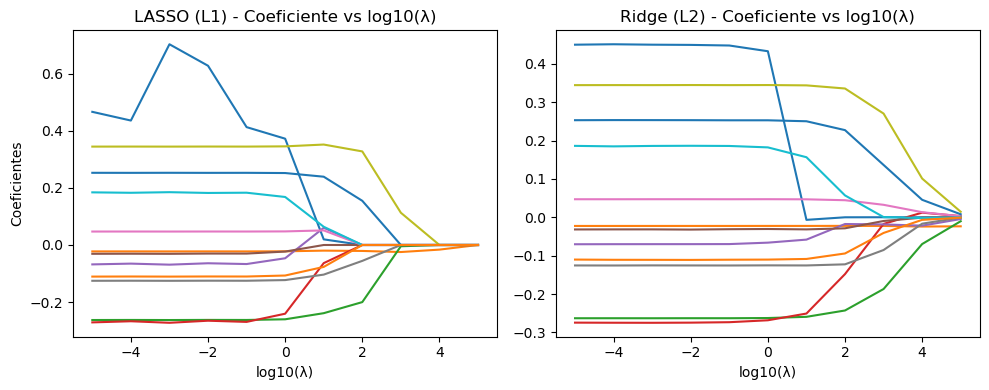

In [19]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Grilla de penalización λ = 10^n  → en sklearn C = 1/λ
lambdas = [10**n for n in range(-5, 6)]
Cs = [1/l for l in lambdas]

# Ajustar modelos y guardar coeficientes
coefs_l1, coefs_l2 = [], []
for C in Cs:
    lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000).fit(X_train, y_train)
    lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=C, max_iter=1000).fit(X_train, y_train)
    coefs_l1.append(lr_l1.coef_.ravel())
    coefs_l2.append(lr_l2.coef_.ravel())

# Graficar
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.log10(lambdas), coefs_l1)
plt.title("LASSO (L1) - Coeficiente vs log10(λ)")
plt.xlabel("log10(λ)"); plt.ylabel("Coeficientes")

plt.subplot(1,2,2)
plt.plot(np.log10(lambdas), coefs_l2)
plt.title("Ridge (L2) - Coeficiente vs log10(λ)")
plt.xlabel("log10(λ)")
plt.tight_layout()
plt.show()

In [22]:
#A.2

In [20]:
from sklearn.linear_model import LogisticRegressionCV

# Valores de C equivalentes a tus lambdas (C = 1/lambda)
C_values = [1/l for l in lambdas]

# === Cross-validation para L1 (LASSO) ===
cv_l1 = LogisticRegressionCV(
    Cs=C_values,
    cv=5,
    penalty='l1',
    solver='liblinear',
    scoring='accuracy',
    max_iter=2000,
    n_jobs=-1
)
cv_l1.fit(X_train, y_train)

# === Cross-validation para L2 (Ridge) ===
cv_l2 = LogisticRegressionCV(
    Cs=C_values,
    cv=5,
    penalty='l2',
    solver='lbfgs',
    scoring='accuracy',
    max_iter=2000,
    n_jobs=-1
)
cv_l2.fit(X_train, y_train)

LogisticRegressionCV(Cs=[99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0,
                         0.1, 0.01, 0.001, 0.0001, 1e-05],
                     cv=5, max_iter=2000, n_jobs=-1, scoring='accuracy')

In [21]:
logitcv_lasso = LogisticRegressionCV(
    Cs=Cs,
    penalty="l1",
    solver="liblinear",
    cv=5,
    scoring="accuracy",
    max_iter=2000,
    random_state=0
)
logitcv_lasso.fit(X_train_25, y_train_25.values)

scores_lasso = list(logitcv_lasso.scores_.values())[0]
errors_lasso = 1 - scores_lasso
mean_errors_lasso = errors_lasso.mean(axis=0)
idx_min_lasso = np.argmin(mean_errors_lasso)
lambda_cv_lasso = float(lambdas[idx_min_lasso])
C_opt_lasso = float(logitcv_lasso.C_[0])

logitcv_ridge = LogisticRegressionCV(
    Cs=Cs,
    penalty="l2",
    solver="lbfgs",
    cv=5,
    scoring="accuracy",
    max_iter=2000,
    random_state=0
)
logitcv_ridge.fit(X_train_25, y_train_25.values)

scores_ridge = list(logitcv_ridge.scores_.values())[0]
errors_ridge = 1 - scores_ridge
mean_errors_ridge = errors_ridge.mean(axis=0)
idx_min_ridge = np.argmin(mean_errors_ridge)
lambda_cv_ridge = float(lambdas[idx_min_ridge])
C_opt_ridge = float(logitcv_ridge.C_[0])

print("LASSO - lambda^cv:", round(lambda_cv_lasso, 5), " | C óptimo:", round(C_opt_lasso, 5))
print("Error LASSO CV:", round(mean_errors_lasso[idx_min_lasso], 4))
print("Ridge - lambda^cv:", round(lambda_cv_ridge, 5), " | C óptimo:", round(C_opt_ridge, 5))
print("Error Ridge CV:", round(mean_errors_ridge[idx_min_ridge], 4))

LASSO - lambda^cv: 1e-05  | C óptimo: 100000.0
Error LASSO CV: 0.2626
Ridge - lambda^cv: 1.0  | C óptimo: 1.0
Error Ridge CV: 0.2628


In [22]:
# Errores LASSO
scores_lasso = list(logitcv_lasso.scores_.values())[0]
errors_lasso = 1 - scores_lasso
mean_errors_lasso = errors_lasso.mean(axis=0)

# Errores Ridge
scores_ridge = list(logitcv_ridge.scores_.values())[0]
errors_ridge = 1 - scores_ridge
mean_errors_ridge = errors_ridge.mean(axis=0)

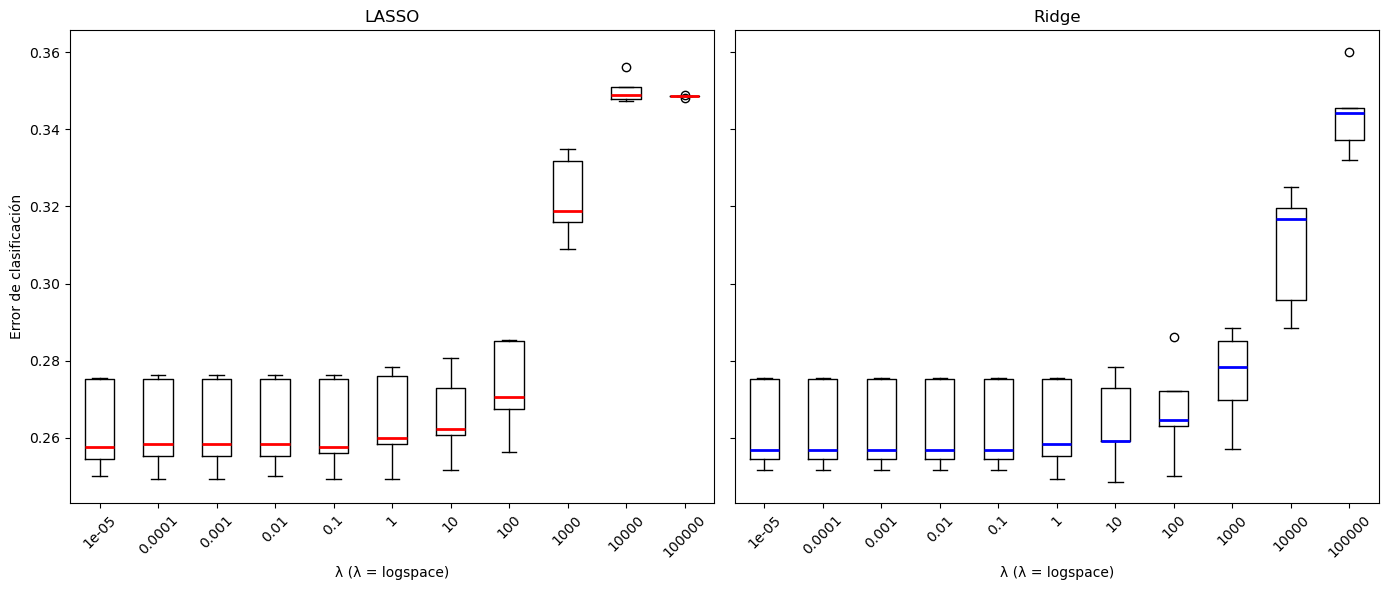

In [23]:
positions = np.arange(len(lambdas)) + 1  # posiciones en eje x

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- LASSO ---
axes[0].boxplot(
    [errors_lasso[:, j] for j in range(len(lambdas))],
    positions=positions,
    medianprops=dict(color="red", linewidth=2)   # SOLO la mediana roja
)
axes[0].set_xticks(positions)
axes[0].set_xticklabels([str(l) for l in lambdas], rotation=45)
axes[0].set_title("LASSO")
axes[0].set_xlabel("λ (λ = logspace)")
axes[0].set_ylabel("Error de clasificación")

# --- RIDGE ---
axes[1].boxplot(
    [errors_ridge[:, j] for j in range(len(lambdas))],
    positions=positions,
    medianprops=dict(color="blue", linewidth=2)  # SOLO la mediana azul
)
axes[1].set_xticks(positions)
axes[1].set_xticklabels([str(l) for l in lambdas], rotation=45)
axes[1].set_title("Ridge")
axes[1].set_xlabel("λ (λ = logspace)")

plt.tight_layout()
plt.show()

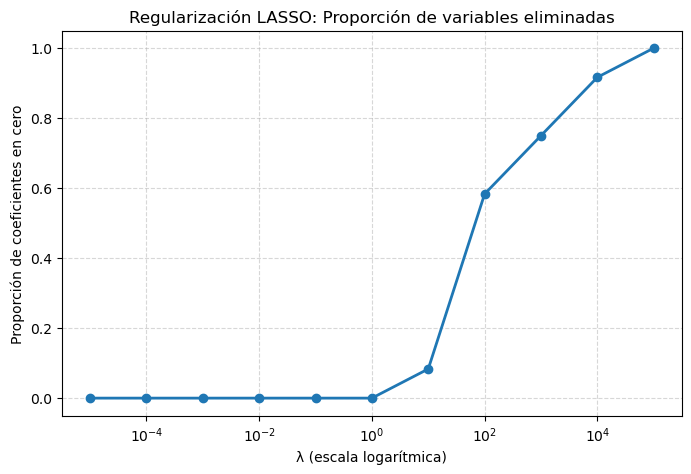

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

proporciones_cero = []

for C in Cs:   # Cs viene de tu código: Cs = 1 / lambdas
    model = LogisticRegression(
        penalty="l1",
        solver="liblinear",
        C=C,
        max_iter=2000
    )
    model.fit(X_train_25, y_train_25.values)

    coef = model.coef_.ravel()
    proporción = np.mean(coef == 0)
    proporciones_cero.append(proporción)

plt.figure(figsize=(8, 5))
plt.plot(lambdas, proporciones_cero, marker="o", linewidth=2)
plt.xscale("log")
plt.xlabel("λ (escala logarítmica)")
plt.ylabel("Proporción de coeficientes en cero")
plt.title("Regularización LASSO: Proporción de variables eliminadas")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
#A.3

In [25]:
# === Modelos finales con λ óptimos ===
λ_l1 = 1 / cv_l1.C_[0]
λ_l2 = 1 / cv_l2.C_[0]

lr_simple = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1/λ_l1, max_iter=1000)
lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1/λ_l2, max_iter=1000)

# Entrenar modelos
lr_simple.fit(X_train, y_train)
lr_l1.fit(X_train, y_train)
lr_l2.fit(X_train, y_train)

# === Tabla comparativa de coeficientes ===
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Sin penalidad': lr_simple.coef_.ravel(),
    'L1 (LASSO)': lr_l1.coef_.ravel(),
    'L2 (Ridge)': lr_l2.coef_.ravel()
})

display(coef_df.round(4))

# === Interpretación breve ===
print("🔹 LASSO (L1) tiende a eliminar variables (coeficientes = 0).")
print("🔹 Ridge (L2) reduce la magnitud de los coeficientes pero no los elimina.")
print("🔹 Ambos reducen la varianza y controlan el sobreajuste del modelo logístico.")

,Variable,Sin penalidad,L1 (LASSO),L2 (Ridge)
0,intercepto,0.4493,0.1083,0.4329
1,ch06,-0.0225,-0.0225,-0.0225
2,nivel_ed,-0.2628,-0.2630,-0.2626
3,estado,-0.2739,-0.2724,-0.2685
4,cat_ocup,-0.0699,-0.0688,-0.0661
5,ch04,-0.0317,-0.0308,-0.0305
6,ch03,0.0472,0.0471,0.0472
7,ch07,-0.1255,-0.1254,-0.1253
8,ch08,0.3446,0.3447,0.3448
9,ch09,0.1845,0.1849,0.1823


🔹 LASSO (L1) tiende a eliminar variables (coeficientes = 0).
🔹 Ridge (L2) reduce la magnitud de los coeficientes pero no los elimina.
🔹 Ambos reducen la varianza y controlan el sobreajuste del modelo logístico.


In [ ]:
#4

Evaluando 687 valores de ccp_alpha...
El menor error de clasificación (0.2239) se obtiene con ccp_alpha = 0.001568


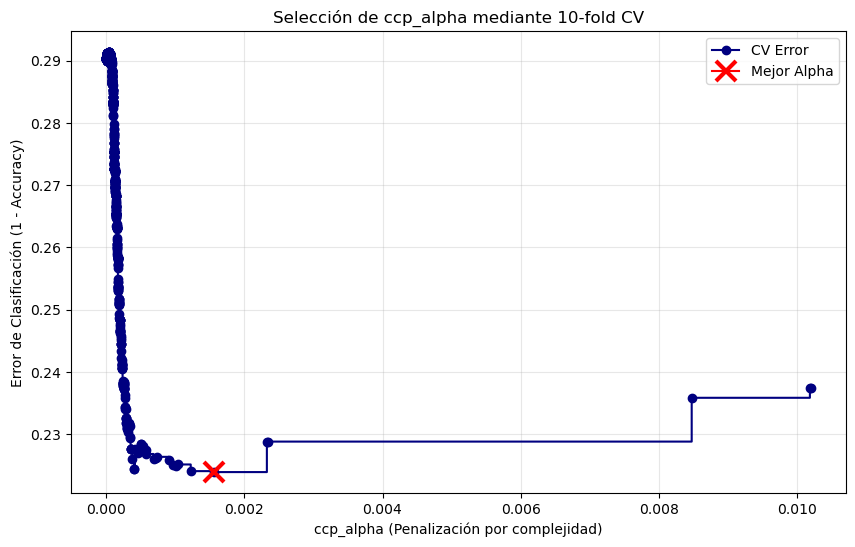

Alpha elegido para podar: 0.0015680628300901167


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Generamos el camino de poda (ccp_alphas) basado en el árbol completo
# Ajustamos un árbol sin restricciones para ver los candidatos de alpha
clf_base = DecisionTreeClassifier(random_state=444)
path = clf_base.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Eliminamos el último alpha porque suele dejar el árbol con un solo nodo (raíz)
ccp_alphas = ccp_alphas[:-1] 
ccp_alphas = ccp_alphas[ccp_alphas >= 0]

print(f"Evaluando {len(ccp_alphas)} valores de ccp_alpha...")

# Loop de Cross-Validation para cada alpha
cv_errors = []

# Iteramos sobre los alphas candidatos
for alpha in ccp_alphas:
    # Creamos el árbol con el alpha actual
    clf = DecisionTreeClassifier(random_state=444, ccp_alpha=alpha)
    
    # Realizamos 10-fold Cross-Validation
    # scoring='accuracy' devuelve la precisión promedio
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    
    # Calculamos el error de clasificación (1 - Accuracy)
    mean_error = 1 - scores.mean()
    cv_errors.append(mean_error)

# Identificar el alpha óptimo (el que minimiza el error)
min_error = min(cv_errors)
best_alpha_idx = cv_errors.index(min_error)
best_alpha = ccp_alphas[best_alpha_idx]

print(f"El menor error de clasificación ({min_error:.4f}) se obtiene con ccp_alpha = {best_alpha:.6f}")

# Gráfico de línea: Error de clasificación vs ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, cv_errors, marker='o', drawstyle="steps-post", color='navy', label='CV Error')

# Marcar el punto óptimo
plt.plot(best_alpha, min_error, marker='x', color='red', markersize=15, markeredgewidth=3, label='Mejor Alpha')

plt.xlabel("ccp_alpha (Penalización por complejidad)")
plt.ylabel("Error de Clasificación (1 - Accuracy)")
plt.title("Selección de ccp_alpha mediante 10-fold CV")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Guardamos el mejor alpha para el siguiente punto
print(f"Alpha elegido para podar: {best_alpha}")

In [ ]:
#5

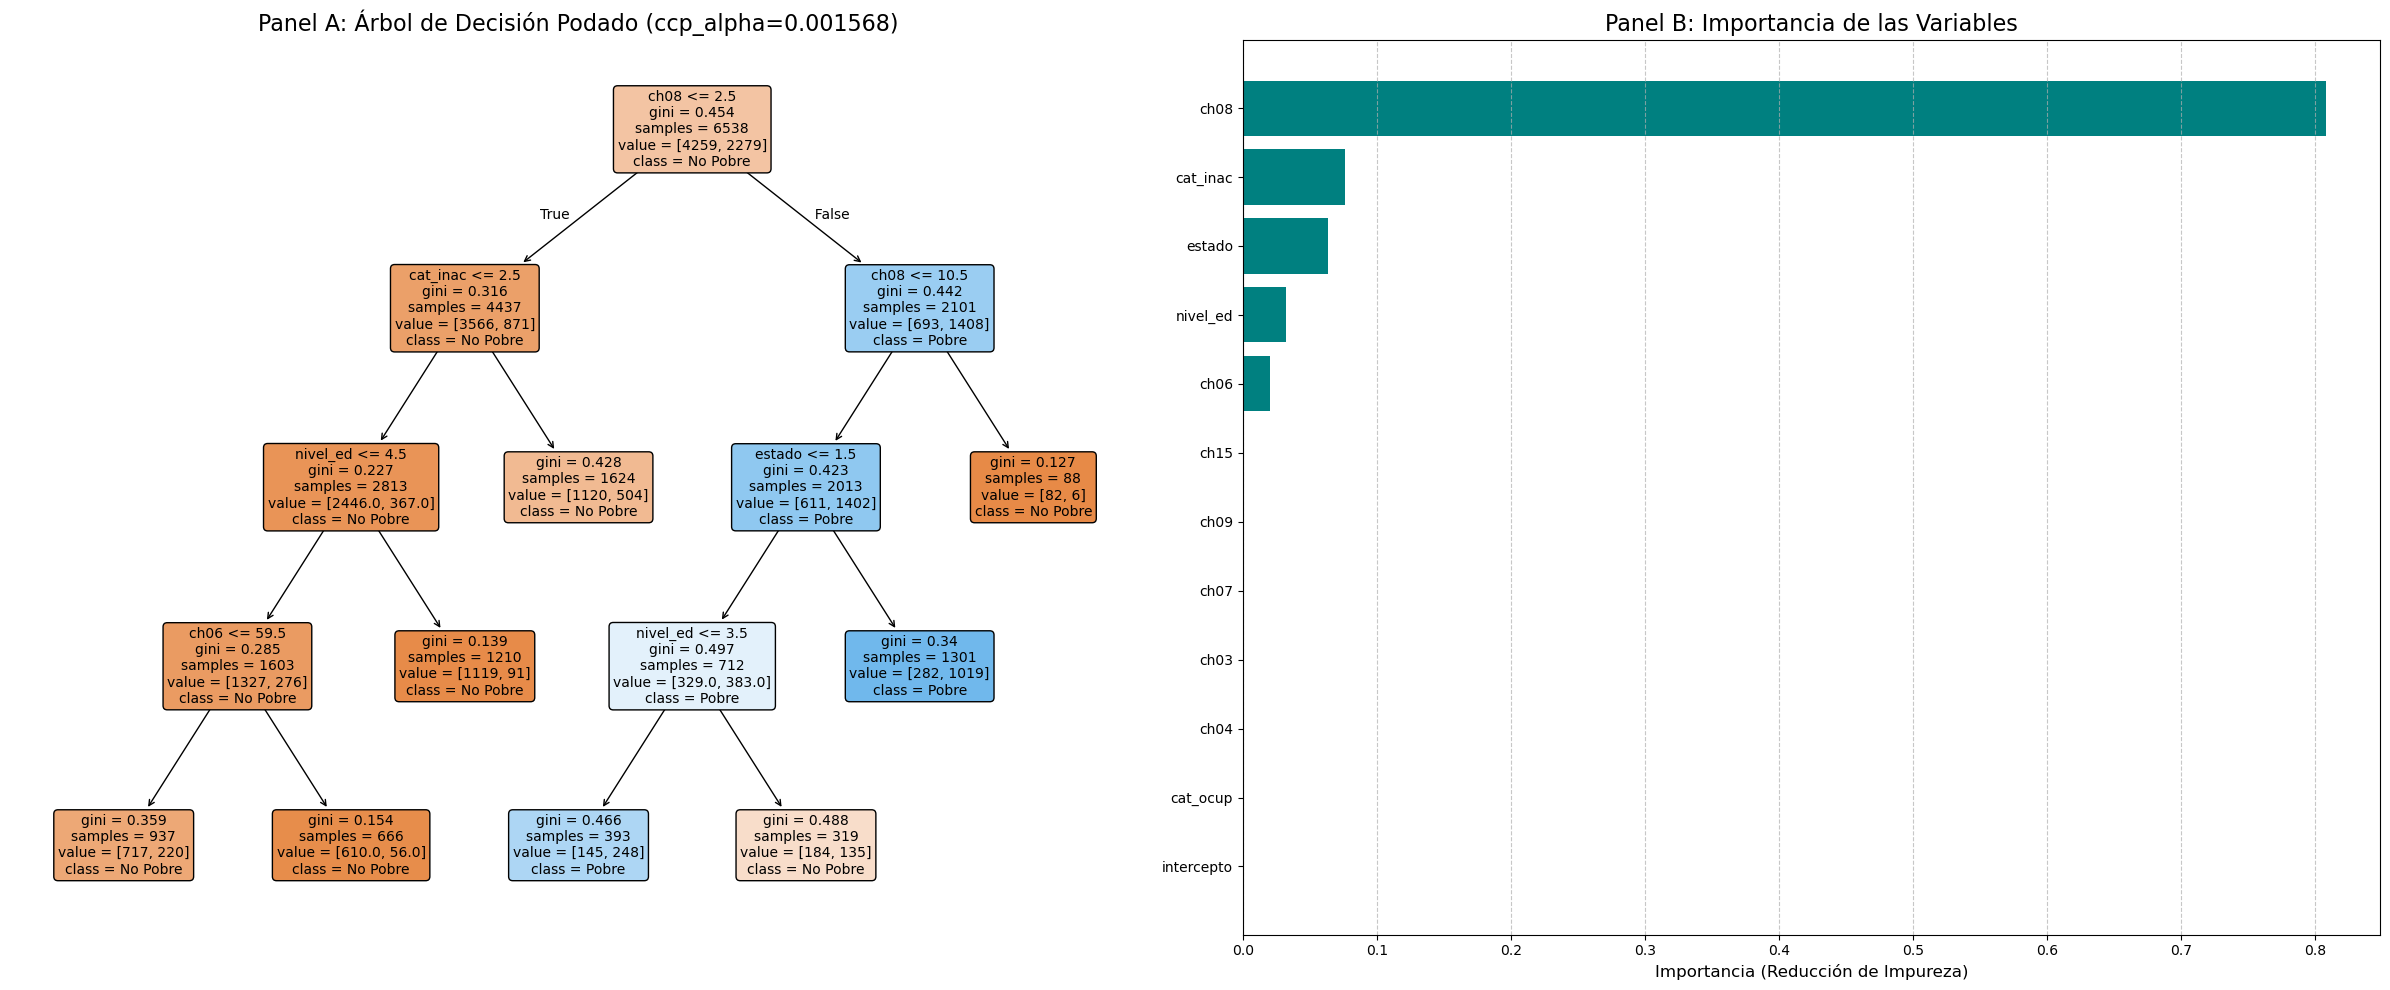

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Entrenamos el Árbol Podado Final con el mejor alpha encontrado
# Usamos el best_alpha obtenido en el inciso 4
tree_pruned = DecisionTreeClassifier(random_state=444, ccp_alpha=best_alpha)
tree_pruned.fit(X_train, y_train)

# Configuración de la figura con 2 paneles (A y B)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# PANEL A: Visualización del Árbol 
# Definimos nombres de clases (ajustalo según el target: 0='No Pobre', 1='Pobre')
class_names = ['No Pobre', 'Pobre'] 

plot_tree(tree_pruned, 
          feature_names=X_train.columns,
          class_names=class_names,
          filled=True,              # Colorea los nodos según la clase mayoritaria
          rounded=True,             # Bordes redondeados
          fontsize=10,              # Tamaño de letra
          ax=axes[0])               # Ubicar en el primer panel

axes[0].set_title(f"Panel A: Árbol de Decisión Podado (ccp_alpha={best_alpha:.6f})", fontsize=16)

# PANEL B: Importancia de Predictores 
# Extraemos la importancia (Gini Importance)
importances = tree_pruned.feature_importances_
feature_names = X_train.columns

# Creamos un DataFrame para ordenar y graficar fácil
df_importances = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
df_importances = df_importances.sort_values(by='Importancia', ascending=True)

# Gráfico de barras horizontales
axes[1].barh(df_importances['Variable'], df_importances['Importancia'], color='teal')
axes[1].set_xlabel("Importancia (Reducción de Impureza)", fontsize=12)
axes[1].set_title("Panel B: Importancia de las Variables", fontsize=16)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se superpongan
plt.tight_layout()
plt.show()

In [28]:
########################################################
#   C) COMPARACIÓN DE MODELOS - TP4 FUNCIONANDO
########################################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# ===============================
# 1. Selección de K con Cross Validation
# ===============================

k_range = range(1,31)
acc_cv = []

for k in k_range:
    modelo_knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(modelo_knn, X_train_25, y_train_25, cv=5, scoring="accuracy")
    acc_cv.append(score.mean())

best_k = k_range[acc_cv.index(max(acc_cv))]
print(f"📌 Mejor K según CV = {best_k}")

modelo_knn = KNeighborsClassifier(n_neighbors=best_k)
modelo_knn.fit(X_train_25, y_train_25)

# ===============================
# 2. Probabilidades y predicciones
# (usa LOS MISMOS MODELOS que ya entrenaste antes)
# ===============================

proba_logit   = lr.predict_proba(X_test_25)[:,1]          # tu logit original
proba_lasso   = lr_l1.predict_proba(X_test_25)[:,1]       # L1 ya entrenado
proba_ridge   = lr_l2.predict_proba(X_test_25)[:,1]       # L2 ya entrenado
proba_tree    = dt_model.predict_proba(X_test_25)[:,1]    # árbol podado del TP
proba_knn     = modelo_knn.predict_proba(X_test_25)[:,1]  # el nuevo KNN

# ===============================
# 3. Función para evaluar modelos
# ===============================

def evaluar(modelo, y_true, y_score, thr=0.5):
    pred = (y_score >= thr).astype(int)
    return {
        "Modelo": modelo,
        "Accuracy": accuracy_score(y_true, pred),
        "1-Accuracy": 1-accuracy_score(y_true, pred),
        "Recall pobres": recall_score(y_true, pred, pos_label=1),
        "F1 pobres": f1_score(y_true, pred, pos_label=1),
        "AUC ROC": roc_auc_score(y_true, y_score),
        "Confusion matrix": confusion_matrix(y_true, pred)
    }

# ===============================
# 4. TABLA COMPARATIVA FINAL
# ===============================

resultados = pd.DataFrame([
    evaluar("Logit",               y_test_25, proba_logit),
    evaluar("LASSO (L1)",          y_test_25, proba_lasso),
    evaluar("Ridge (L2)",          y_test_25, proba_ridge),
    evaluar("Árbol podado",        y_test_25, proba_tree),
    evaluar(f"KNN (k={best_k})",   y_test_25, proba_knn)
])

display(resultados.style.highlight_max(color="lightgreen", axis=0))


📌 Mejor K según CV = 30


NameError: name 'lr' is not defined

,Modelo,Accuracy,1-Accuracy,Recall pobres,F1 pobres,AUC ROC
0,Logit simple,0.7395,0.2605,0.5159,0.5800,0.7948
1,LASSO (L1),0.7395,0.2605,0.5159,0.5800,0.7948
2,Ridge (L2),0.7398,0.2602,0.5159,0.5803,0.7949
3,Árbol podado,0.7812,0.2188,0.5609,0.6413,0.8148
4,KNN (k=30),0.7741,0.2259,0.6100,0.6532,0.8220



Modelo: Logit simple
Matriz de confusión (filas = real, columnas = predicho)
[[1568  257]
 [ 473  504]]
Accuracy: 0.7395 | 1-Accuracy: 0.2605
Recall pobres: 0.5159 | F1 pobres: 0.5800
AUC ROC: 0.7948

Modelo: LASSO (L1)
Matriz de confusión (filas = real, columnas = predicho)
[[1568  257]
 [ 473  504]]
Accuracy: 0.7395 | 1-Accuracy: 0.2605
Recall pobres: 0.5159 | F1 pobres: 0.5800
AUC ROC: 0.7948

Modelo: Ridge (L2)
Matriz de confusión (filas = real, columnas = predicho)
[[1569  256]
 [ 473  504]]
Accuracy: 0.7398 | 1-Accuracy: 0.2602
Recall pobres: 0.5159 | F1 pobres: 0.5803
AUC ROC: 0.7949

Modelo: Árbol podado
Matriz de confusión (filas = real, columnas = predicho)
[[1641  184]
 [ 429  548]]
Accuracy: 0.7812 | 1-Accuracy: 0.2188
Recall pobres: 0.5609 | F1 pobres: 0.6413
AUC ROC: 0.8148

Modelo: KNN (k=30)
Matriz de confusión (filas = real, columnas = predicho)
[[1573  252]
 [ 381  596]]
Accuracy: 0.7741 | 1-Accuracy: 0.2259
Recall pobres: 0.6100 | F1 pobres: 0.6532
AUC ROC: 0.8220


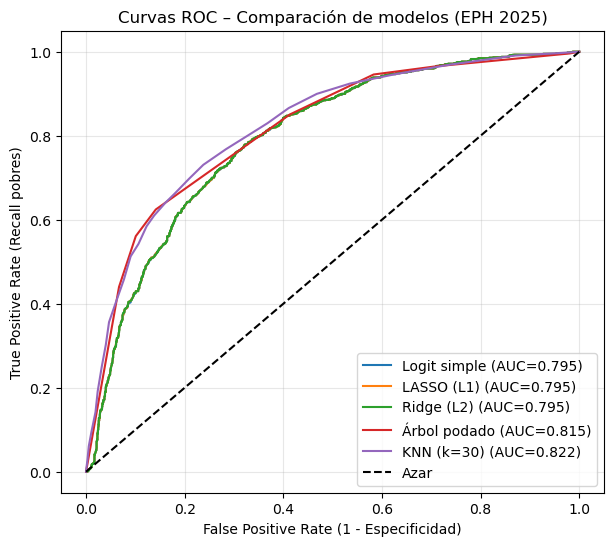

In [30]:
########################################################
#   PARTE C - COMPARACIÓN DE MODELOS (Logit, L1, L2, Árbol, KNN)
########################################################

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    recall_score,
    f1_score
)

# ===============================
# 1) Probabilidades en TEST 2025
#    (usamos LOS MODELOS QUE YA TENÉS ENTRENADOS)
# ===============================

proba_logit   = lr_simple.predict_proba(X_test_25)[:, 1]        # logit sin penalidad
proba_lasso   = lr_l1.predict_proba(X_test_25)[:, 1]            # L1
proba_ridge   = lr_l2.predict_proba(X_test_25)[:, 1]            # L2
proba_tree    = tree_pruned.predict_proba(X_test_25)[:, 1]      # árbol podado
proba_knn     = modelo_knn.predict_proba(X_test_25)[:, 1]       # KNN con best_k

# ===============================
# 2) Función para evaluar modelos
# ===============================

def evaluar(modelo, y_true, y_score, thr=0.5):
    y_pred = (y_score >= thr).astype(int)
    cm = confusion_matrix(y_true, y_pred)

    return {
        "Modelo": modelo,
        "Accuracy": accuracy_score(y_true, y_pred),
        "1-Accuracy": 1 - accuracy_score(y_true, y_pred),
        "Recall pobres": recall_score(y_true, y_pred, pos_label=1),
        "F1 pobres": f1_score(y_true, y_pred, pos_label=1),
        "AUC ROC": roc_auc_score(y_true, y_score),
        "Matriz de confusión": cm
    }

# ===============================
# 3) Tabla comparativa
# ===============================

resultados = pd.DataFrame([
    evaluar("Logit simple",          y_test_25, proba_logit),
    evaluar("LASSO (L1)",            y_test_25, proba_lasso),
    evaluar("Ridge (L2)",            y_test_25, proba_ridge),
    evaluar("Árbol podado",          y_test_25, proba_tree),
    evaluar("KNN (k={})".format(best_k), y_test_25, proba_knn)
])

display(resultados.drop(columns=["Matriz de confusión"]).round(4))

# ===============================
# 4) Mostrar matrices de confusión
# ===============================

for _, fila in resultados.iterrows():
    print("\n==============================")
    print("Modelo:", fila["Modelo"])
    print("Matriz de confusión (filas = real, columnas = predicho)")
    print(fila["Matriz de confusión"])
    print(f"Accuracy: {fila['Accuracy']:.4f} | 1-Accuracy: {fila['1-Accuracy']:.4f}")
    print(f"Recall pobres: {fila['Recall pobres']:.4f} | F1 pobres: {fila['F1 pobres']:.4f}")
    print(f"AUC ROC: {fila['AUC ROC']:.4f}")

# ===============================
# 5) Curvas ROC comparadas
# ===============================

plt.figure(figsize=(7,6))

for nombre, proba in [
    ("Logit simple", proba_logit),
    ("LASSO (L1)",   proba_lasso),
    ("Ridge (L2)",   proba_ridge),
    ("Árbol podado", proba_tree),
    ("KNN (k={})".format(best_k), proba_knn),
]:
    fpr, tpr, _ = roc_curve(y_test_25, proba)
    auc_val = roc_auc_score(y_test_25, proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("False Positive Rate (1 - Especificidad)")
plt.ylabel("True Positive Rate (Recall pobres)")
plt.title("Curvas ROC – Comparación de modelos (EPH 2025)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
